# Rangkuman Chapter 1: The Machine Learning Landscape

## "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"


## 1. Apa itu Machine Learning?

Machine Learning adalah ilmu (dan seni) memprogram komputer agar dapat belajar dari data.

**Definisi formal (Tom Mitchell, 1997):**

> Sebuah program komputer dikatakan belajar dari pengalaman E dengan respect terhadap tugas T dan ukuran performa P, jika performanya pada T, yang diukur oleh P, meningkat dengan pengalaman E.

**Contoh Spam Filter:**
- **Task (T)**: Menandai email spam
- **Experience (E)**: Training data (email yang sudah dilabeli)
- **Performance (P)**: Accuracy (rasio email yang diklasifikasi dengan benar)

## 2. Mengapa Menggunakan Machine Learning?

ML sangat berguna untuk:
1. **Problem yang memerlukan banyak fine-tuning atau rules yang panjang**
2. **Problem kompleks yang tidak ada solusi tradisional yang baik**
3. **Lingkungan yang berubah-ubah**: ML system dapat beradaptasi dengan data baru
4. **Mendapatkan insight dari data dalam jumlah besar**

## 3. Tipe-Tipe Machine Learning Systems

### 3.1 Supervised vs Unsupervised Learning

#### Supervised Learning
Training set sudah memiliki label/solusi yang diinginkan.

**Algoritma utama:**
- k-Nearest Neighbors
- Linear Regression
- Logistic Regression
- Support Vector Machines (SVMs)
- Decision Trees and Random Forests
- Neural networks

#### Unsupervised Learning
Training data tidak memiliki label.

**Algoritma utama:**
- **Clustering**: K-Means, DBSCAN, HCA
- **Anomaly detection**: One-class SVM, Isolation Forest
- **Dimensionality reduction**: PCA, Kernel PCA, LLE, t-SNE

### 3.2 Batch vs Online Learning

- **Batch Learning**: Model dilatih dengan semua data sekaligus (offline)
- **Online Learning**: Model dilatih secara incremental dengan data yang datang secara sequential

### 3.3 Instance-Based vs Model-Based Learning

- **Instance-Based**: Belajar dengan menghafal contoh, lalu generalisasi dengan similarity measure
- **Model-Based**: Membangun model dari contoh, lalu gunakan model untuk prediksi

## 4. Main Challenges of Machine Learning

### 4.1 Bad Data
1. **Insufficient Quantity of Training Data**: Butuh ribuan hingga jutaan contoh
2. **Nonrepresentative Training Data**: Data training harus representatif terhadap data baru
3. **Poor-Quality Data**: Error, outlier, noise
4. **Irrelevant Features**: Feature engineering penting untuk kesuksesan ML

### 4.2 Bad Algorithm
1. **Overfitting**: Model terlalu kompleks, performa baik di training tapi buruk di data baru
   - Solusi: Simplify model, lebih banyak data, reduce noise, regularization
2. **Underfitting**: Model terlalu sederhana
   - Solusi: Model lebih powerful, feature engineering, reduce constraints

## 5. Testing and Validating

Cara untuk mengetahui seberapa baik model generalisasi adalah dengan mengujinya pada data baru.

### 5.1 Split Data
- **Training Set (80%)**: Untuk training model
- **Test Set (20%)**: Untuk evaluasi generalization error

### 5.2 Hyperparameter Tuning and Model Selection
Gunakan **validation set** atau **cross-validation**:
- **Holdout Validation**: Pisahkan sebagian training set untuk validation
- **Cross-Validation**: Gunakan beberapa validation sets kecil, average hasilnya

### 5.3 Dataset Split
- **Training Set**: Untuk training model
- **Validation Set**: Untuk hyperparameter tuning dan model selection
- **Test Set**: Untuk evaluasi final (jangan disentuh sampai akhir!)
- **Train-dev Set**: Untuk detect data mismatch (optional)

## 6. Contoh Implementasi: Model-Based Learning

### Studi Kasus: Apakah uang membuat orang bahagia?
Model linear untuk memprediksi life satisfaction berdasarkan GDP per capita.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Create sample data (GDP per capita vs Life Satisfaction)
# Data berdasarkan contoh dari buku

country_stats = pd.DataFrame({
    'Country': ['Hungary', 'Korea', 'France', 'Australia', 'United States'],
    'GDP per capita': [12240, 27195, 37675, 50962, 55805],
    'Life satisfaction': [4.9, 5.8, 6.5, 7.3, 7.2]
})

print("\nCountry Statistics:")
print(country_stats)


Country Statistics:
         Country  GDP per capita  Life satisfaction
0        Hungary           12240                4.9
1          Korea           27195                5.8
2         France           37675                6.5
3      Australia           50962                7.3
4  United States           55805                7.2


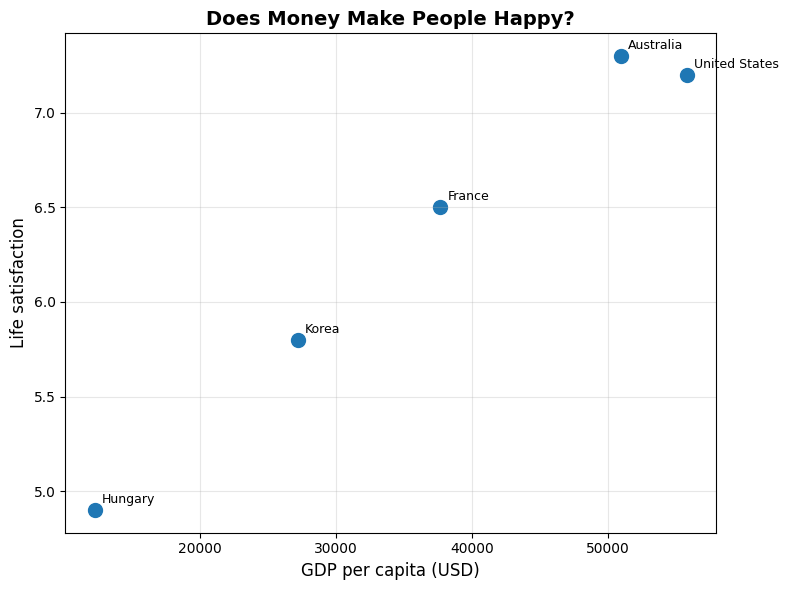

Dari plot terlihat ada trend linear positif antara GDP per capita dan Life satisfaction


In [3]:
# Visualisasi data
plt.figure(figsize=(8, 6))
plt.scatter(country_stats['GDP per capita'], country_stats['Life satisfaction'], s=100)
plt.xlabel('GDP per capita (USD)', fontsize=12)
plt.ylabel('Life satisfaction', fontsize=12)
plt.title('Does Money Make People Happy?', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add country labels
for idx, row in country_stats.iterrows():
    plt.annotate(row['Country'], 
                 (row['GDP per capita'], row['Life satisfaction']),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

print("Dari plot terlihat ada trend linear positif antara GDP per capita dan Life satisfaction")

### Model 1: Linear Regression

In [4]:
# Prepare data for training
X = country_stats[['GDP per capita']].values  # Features (2D array)
y = country_stats['Life satisfaction'].values  # Target

print("Feature shape (X):", X.shape)
print("Target shape (y):", y.shape)

Feature shape (X): (5, 1)
Target shape (y): (5,)


In [5]:
# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Display model parameters
print("\n=== Linear Regression Model ===")
print(f"Intercept (θ0): {lin_reg.intercept_:.2f}")
print(f"Coefficient (θ1): {lin_reg.coef_[0]:.2e}")
print(f"\nModel equation: Life_satisfaction = {lin_reg.intercept_:.2f} + {lin_reg.coef_[0]:.2e} × GDP_per_capita")


=== Linear Regression Model ===
Intercept (θ0): 4.28
Coefficient (θ1): 5.61e-05

Model equation: Life_satisfaction = 4.28 + 5.61e-05 × GDP_per_capita


In [6]:
# Make prediction for Cyprus
cyprus_gdp = [[22587]]  # Cyprus's GDP per capita
cyprus_prediction = lin_reg.predict(cyprus_gdp)

print(f"\nPrediction for Cyprus (GDP per capita = ${cyprus_gdp[0][0]:,}):")
print(f"Predicted Life Satisfaction: {cyprus_prediction[0]:.2f}")


Prediction for Cyprus (GDP per capita = $22,587):
Predicted Life Satisfaction: 5.54


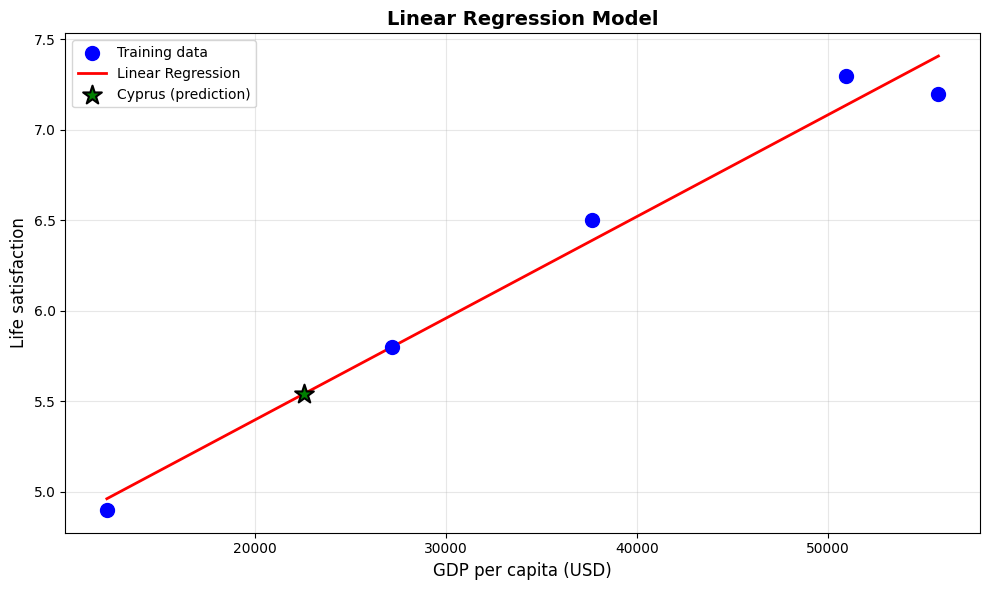

In [7]:
# Visualize the model
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X, y, s=100, label='Training data', color='blue', zorder=5)

# Plot regression line
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = lin_reg.predict(X_plot)
plt.plot(X_plot, y_plot, 'r-', linewidth=2, label='Linear Regression', zorder=4)

# Plot Cyprus prediction
plt.scatter(cyprus_gdp, cyprus_prediction, s=200, marker='*', 
           color='green', label='Cyprus (prediction)', zorder=6, edgecolors='black', linewidth=1.5)

plt.xlabel('GDP per capita (USD)', fontsize=12)
plt.ylabel('Life satisfaction', fontsize=12)
plt.title('Linear Regression Model', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Model 2: k-Nearest Neighbors Regression

In [8]:
# Train k-NN model
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X, y)

# Make prediction for Cyprus
cyprus_prediction_knn = knn_reg.predict(cyprus_gdp)

print("\n=== k-Nearest Neighbors (k=3) Model ===")
print(f"Prediction for Cyprus: {cyprus_prediction_knn[0]:.2f}")

# Compare with Linear Regression
print(f"\nComparison:")
print(f"Linear Regression: {cyprus_prediction[0]:.2f}")
print(f"k-NN Regression (k=3): {cyprus_prediction_knn[0]:.2f}")
print(f"Difference: {abs(cyprus_prediction[0] - cyprus_prediction_knn[0]):.2f}")


=== k-Nearest Neighbors (k=3) Model ===
Prediction for Cyprus: 5.73

Comparison:
Linear Regression: 5.54
k-NN Regression (k=3): 5.73
Difference: 0.19


## 7. Testing and Validating: Implementasi Praktis

Sekarang, implementasikan konsep testing dan validating dengan dataset yang lebih besar.

In [9]:
# Create larger synthetic dataset
np.random.seed(42)

# Generate 100 data points
n_samples = 100
X_full = np.random.uniform(10000, 60000, n_samples).reshape(-1, 1)

# True relationship: life_satisfaction = 4.5 + 5e-5 * GDP + noise
y_full = 4.5 + 5e-5 * X_full.ravel() + np.random.normal(0, 0.3, n_samples)

# Create DataFrame
full_data = pd.DataFrame({
    'GDP per capita': X_full.ravel(),
    'Life satisfaction': y_full
})

print(f"Total dataset size: {len(full_data)} samples")
print(f"\nFirst 5 rows:")
print(full_data.head())
print(f"\nDataset statistics:")
print(full_data.describe())

Total dataset size: 100 samples

First 5 rows:
   GDP per capita  Life satisfaction
0    28727.005942           5.962464
1    57535.715320           7.287084
2    46599.697091           6.857513
3    39932.924210           5.900376
4    17800.932022           5.324145

Dataset statistics:
       GDP per capita  Life satisfaction
count      100.000000         100.000000
mean     33509.037169           6.175128
std      14874.470551           0.753060
min      10276.105856           4.837241
25%      19660.038035           5.521439
50%      33207.122734           6.046993
75%      46510.155960           6.830446
max      59344.346830           7.717491


### 7.1 Train-Test Split

In [10]:
# Split data: 80% training, 20% testing
X_full_data = full_data[['GDP per capita']].values
y_full_data = full_data['Life satisfaction'].values

X_train, X_test, y_train, y_test = train_test_split(
    X_full_data, y_full_data, test_size=0.2, random_state=42
)

print("=== Data Split ===")
print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X_full_data)*100:.0f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X_full_data)*100:.0f}%)")

=== Data Split ===
Training set size: 80 samples (80%)
Test set size: 20 samples (20%)


### 7.2 Training and Evaluation

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train model on training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n=== Model Performance ===")
print("\nTraining Set:")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")

print("\nTest Set (Generalization Error):")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")

# Check for overfitting
print("\n=== Overfitting Check ===")
if test_rmse > train_rmse * 1.2:
    print("⚠️  Warning: Model might be overfitting!")
    print(f"   Test RMSE is {(test_rmse/train_rmse - 1)*100:.1f}% higher than train RMSE")
else:
    print("✓ Model generalizes well (no significant overfitting detected)")
    print(f"  Test RMSE is only {(test_rmse/train_rmse - 1)*100:.1f}% higher than train RMSE")


=== Model Performance ===

Training Set:
  RMSE: 0.2762
  MAE:  0.2204
  R²:   0.8629

Test Set (Generalization Error):
  RMSE: 0.2426
  MAE:  0.1774
  R²:   0.8975

=== Overfitting Check ===
✓ Model generalizes well (no significant overfitting detected)
  Test RMSE is only -12.2% higher than train RMSE


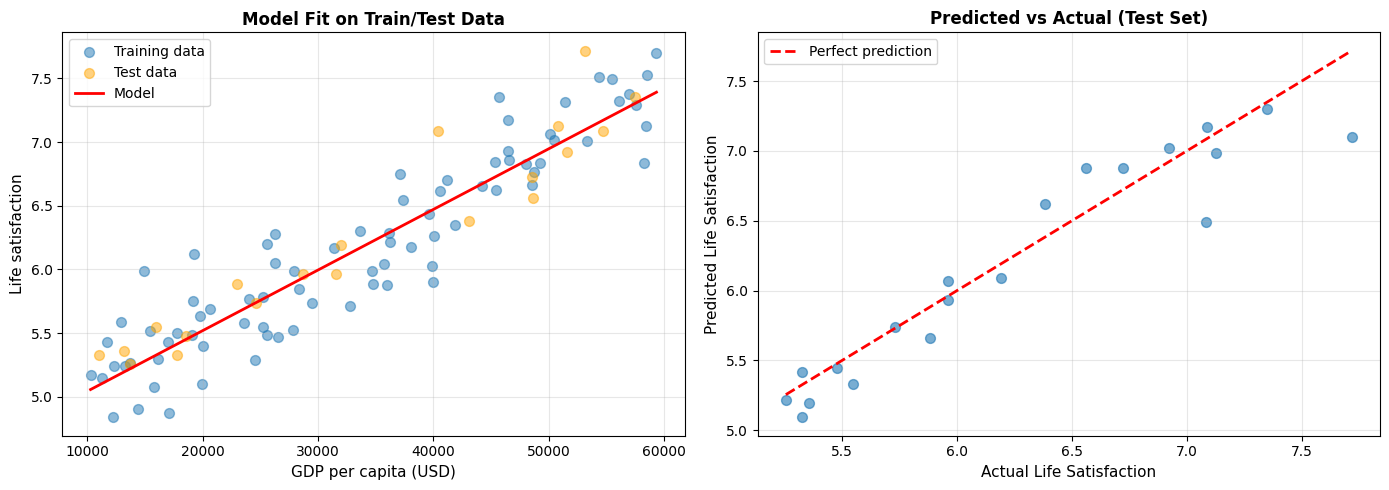

In [12]:
# Visualize predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Training and Test data with model
ax1.scatter(X_train, y_train, alpha=0.5, label='Training data', s=50)
ax1.scatter(X_test, y_test, alpha=0.5, label='Test data', s=50, color='orange')

X_plot = np.linspace(X_full_data.min(), X_full_data.max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
ax1.plot(X_plot, y_plot, 'r-', linewidth=2, label='Model')

ax1.set_xlabel('GDP per capita (USD)', fontsize=11)
ax1.set_ylabel('Life satisfaction', fontsize=11)
ax1.set_title('Model Fit on Train/Test Data', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Predicted vs Actual
ax2.scatter(y_test, y_test_pred, alpha=0.6, s=50)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect prediction')
ax2.set_xlabel('Actual Life Satisfaction', fontsize=11)
ax2.set_ylabel('Predicted Life Satisfaction', fontsize=11)
ax2.set_title('Predicted vs Actual (Test Set)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7.3 Cross-Validation

Cross-validation memberikan estimasi performa yang lebih akurat dengan menggunakan multiple validation sets.

In [13]:
from sklearn.model_selection import cross_val_score, cross_validate

# Perform 5-fold cross-validation
cv_results = cross_validate(
    model, X_train, y_train, 
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True
)

# Convert negative MSE to RMSE
train_rmse_cv = np.sqrt(-cv_results['train_neg_mean_squared_error'])
test_rmse_cv = np.sqrt(-cv_results['test_neg_mean_squared_error'])

train_mae_cv = -cv_results['train_neg_mean_absolute_error']
test_mae_cv = -cv_results['test_neg_mean_absolute_error']

train_r2_cv = cv_results['train_r2']
test_r2_cv = cv_results['test_r2']

print("\n=== 5-Fold Cross-Validation Results ===")
print("\nRMSE per fold:")
for i, (train_score, test_score) in enumerate(zip(train_rmse_cv, test_rmse_cv), 1):
    print(f"  Fold {i}: Train={train_score:.4f}, Validation={test_score:.4f}")

print("\nAverage Scores:")
print(f"  Train RMSE: {train_rmse_cv.mean():.4f} (±{train_rmse_cv.std():.4f})")
print(f"  Valid RMSE: {test_rmse_cv.mean():.4f} (±{test_rmse_cv.std():.4f})")
print(f"  Train MAE:  {train_mae_cv.mean():.4f} (±{train_mae_cv.std():.4f})")
print(f"  Valid MAE:  {test_mae_cv.mean():.4f} (±{test_mae_cv.std():.4f})")
print(f"  Train R²:   {train_r2_cv.mean():.4f} (±{train_r2_cv.std():.4f})")
print(f"  Valid R²:   {test_r2_cv.mean():.4f} (±{test_r2_cv.std():.4f})")


=== 5-Fold Cross-Validation Results ===

RMSE per fold:
  Fold 1: Train=0.2893, Validation=0.2193
  Fold 2: Train=0.2493, Validation=0.3694
  Fold 3: Train=0.2839, Validation=0.2458
  Fold 4: Train=0.2720, Validation=0.2930
  Fold 5: Train=0.2815, Validation=0.2593

Average Scores:
  Train RMSE: 0.2752 (±0.0141)
  Valid RMSE: 0.2774 (±0.0518)
  Train MAE:  0.2197 (±0.0128)
  Valid MAE:  0.2256 (±0.0505)
  Train R²:   0.8623 (±0.0178)
  Valid R²:   0.8304 (±0.0812)


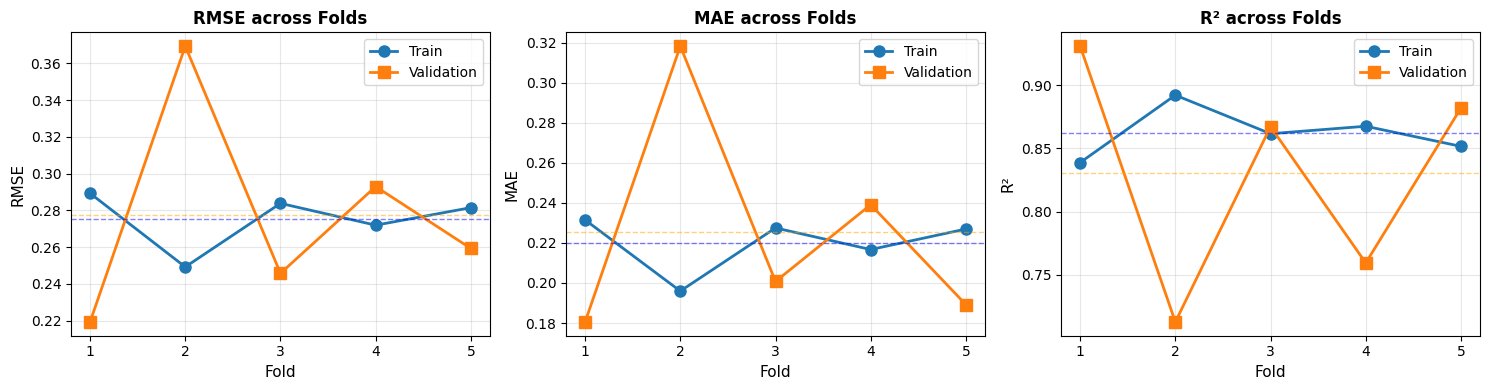

In [14]:
# Visualize cross-validation results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

metrics = [
    ('RMSE', train_rmse_cv, test_rmse_cv),
    ('MAE', train_mae_cv, test_mae_cv),
    ('R²', train_r2_cv, test_r2_cv)
]

for ax, (metric_name, train_scores, valid_scores) in zip(axes, metrics):
    folds = np.arange(1, 6)
    
    ax.plot(folds, train_scores, 'o-', label='Train', linewidth=2, markersize=8)
    ax.plot(folds, valid_scores, 's-', label='Validation', linewidth=2, markersize=8)
    
    ax.axhline(train_scores.mean(), color='blue', linestyle='--', alpha=0.5, linewidth=1)
    ax.axhline(valid_scores.mean(), color='orange', linestyle='--', alpha=0.5, linewidth=1)
    
    ax.set_xlabel('Fold', fontsize=11)
    ax.set_ylabel(metric_name, fontsize=11)
    ax.set_title(f'{metric_name} across Folds', fontsize=12, fontweight='bold')
    ax.set_xticks(folds)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7.4 Hyperparameter Tuning Example

Demonstrasi tuning hyperparameter untuk k-NN model.

In [15]:
# Try different values of k
k_values = [1, 2, 3, 5, 7, 10, 15]
train_scores = []
valid_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Cross-validation
    cv_results = cross_validate(
        knn, X_train, y_train, 
        cv=5,
        scoring='neg_mean_squared_error',
        return_train_score=True
    )
    
    # When scoring is a single string, cross_validate returns 'train_score' and 'test_score'
    train_rmse = np.sqrt(-cv_results['train_score'].mean())
    valid_rmse = np.sqrt(-cv_results['test_score'].mean())
    
    train_scores.append(train_rmse)
    valid_scores.append(valid_rmse)
    
    print(f"k={k:2d}: Train RMSE={train_rmse:.4f}, Valid RMSE={valid_rmse:.4f}")

# Find best k
best_k_idx = np.argmin(valid_scores)
best_k = k_values[best_k_idx]
print(f"\n✓ Best k: {best_k} (Valid RMSE: {valid_scores[best_k_idx]:.4f})")

k= 1: Train RMSE=-0.0000, Valid RMSE=0.3934
k= 2: Train RMSE=0.1918, Valid RMSE=0.3542
k= 3: Train RMSE=0.2217, Valid RMSE=0.3273
k= 5: Train RMSE=0.2491, Valid RMSE=0.3006
k= 7: Train RMSE=0.2622, Valid RMSE=0.2961
k=10: Train RMSE=0.2676, Valid RMSE=0.2928
k=15: Train RMSE=0.2783, Valid RMSE=0.3003

✓ Best k: 10 (Valid RMSE: 0.2928)


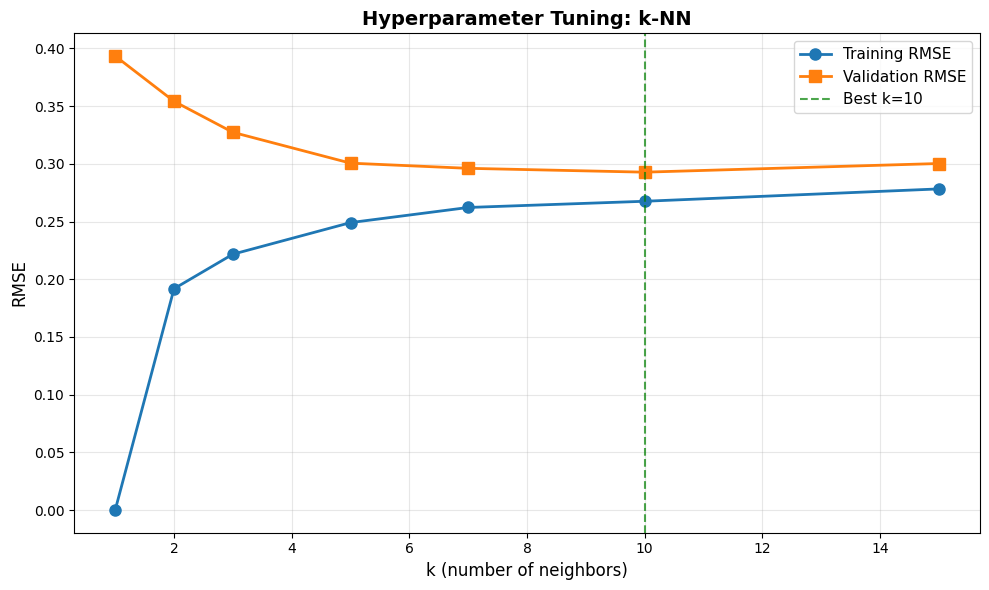


Observasi:
- k terlalu kecil: model overfit (training error rendah, validation error tinggi)
- k terlalu besar: model underfit (kedua error tinggi)
- k optimal: 10 (balance antara bias dan variance)


In [16]:
# Visualize hyperparameter tuning
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, 'o-', label='Training RMSE', linewidth=2, markersize=8)
plt.plot(k_values, valid_scores, 's-', label='Validation RMSE', linewidth=2, markersize=8)
plt.axvline(best_k, color='green', linestyle='--', alpha=0.7, label=f'Best k={best_k}')
plt.xlabel('k (number of neighbors)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Hyperparameter Tuning: k-NN', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nObservasi:")
print("- k terlalu kecil: model overfit (training error rendah, validation error tinggi)")
print("- k terlalu besar: model underfit (kedua error tinggi)")
print(f"- k optimal: {best_k} (balance antara bias dan variance)")

### 7.5 Final Model Evaluation

Setelah memilih model dan hyperparameter terbaik menggunakan validation set, lakukan evaluasi performa final pada test set.

In [17]:
# Train final model with best hyperparameter on full training set
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_train, y_train)

# Evaluate on test set
y_test_pred_final = final_model.predict(X_test)

final_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_final))
final_mae = mean_absolute_error(y_test, y_test_pred_final)
final_r2 = r2_score(y_test, y_test_pred_final)

print("\n" + "="*50)
print("FINAL MODEL EVALUATION ON TEST SET")
print("="*50)
print(f"Model: k-NN Regression with k={best_k}")
print(f"\nTest Set Performance:")
print(f"  RMSE: {final_rmse:.4f}")
print(f"  MAE:  {final_mae:.4f}")
print(f"  R²:   {final_r2:.4f}")
print("\n" + "="*50)
print("✓ Model is ready for production!")
print("="*50)


FINAL MODEL EVALUATION ON TEST SET
Model: k-NN Regression with k=10

Test Set Performance:
  RMSE: 0.2519
  MAE:  0.1813
  R²:   0.8894

✓ Model is ready for production!


## 8. Demonstrasi Overfitting vs Underfitting

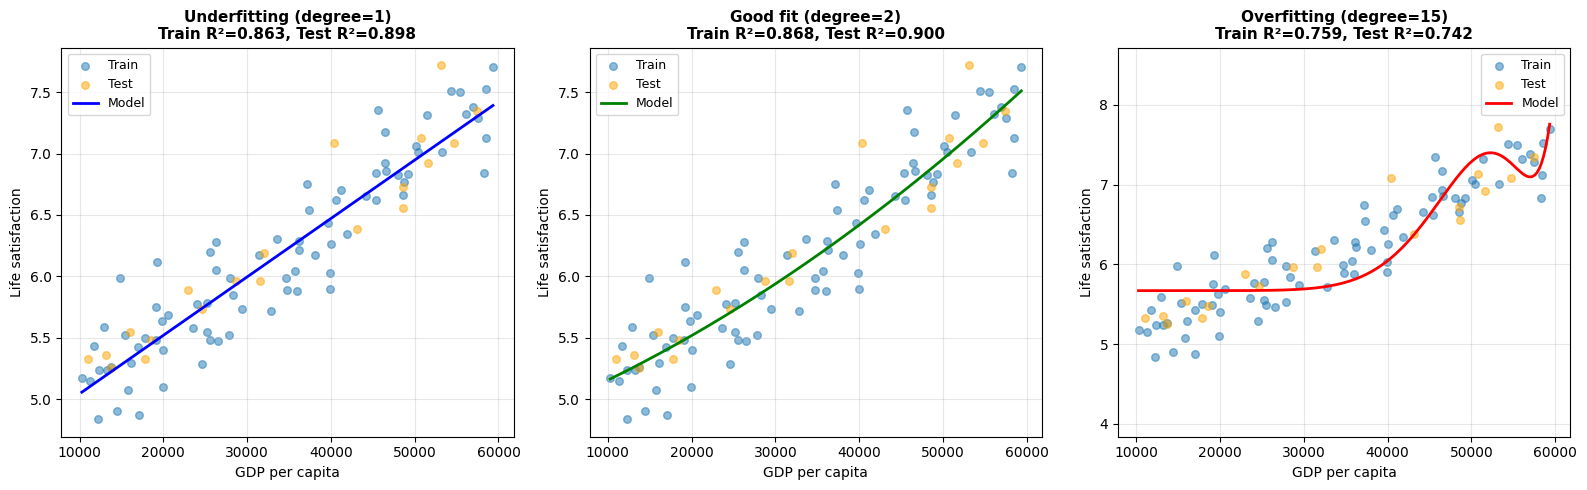


Penjelasan:
1. Underfitting (kiri): Model terlalu sederhana, performa buruk di train & test
2. Good fit (tengah): Model pas, performa baik di train & test
3. Overfitting (kanan): Model terlalu kompleks, performa sangat baik di train tapi buruk di test


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create models with different complexities
models = [
    ("Underfitting (degree=1)", 1, 'blue'),
    ("Good fit (degree=2)", 2, 'green'),
    ("Overfitting (degree=15)", 15, 'red')
]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for ax, (title, degree, color) in zip(axes, models):
    # Create and train polynomial model
    poly_model = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )
    poly_model.fit(X_train, y_train)
    
    # Calculate scores
    train_score = poly_model.score(X_train, y_train)
    test_score = poly_model.score(X_test, y_test)
    
    # Plot
    ax.scatter(X_train, y_train, alpha=0.5, s=30, label='Train')
    ax.scatter(X_test, y_test, alpha=0.5, s=30, color='orange', label='Test')
    
    X_plot = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1, 1)
    y_plot = poly_model.predict(X_plot)
    ax.plot(X_plot, y_plot, color=color, linewidth=2, label='Model')
    
    ax.set_xlabel('GDP per capita', fontsize=10)
    ax.set_ylabel('Life satisfaction', fontsize=10)
    ax.set_title(f'{title}\nTrain R²={train_score:.3f}, Test R²={test_score:.3f}', 
                fontsize=11, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    
    # Set y-axis limits for degree=15 to show overfitting better
    if degree == 15:
        ax.set_ylim([y_full_data.min() - 1, y_full_data.max() + 1])

plt.tight_layout()
plt.show()

print("\nPenjelasan:")
print("1. Underfitting (kiri): Model terlalu sederhana, performa buruk di train & test")
print("2. Good fit (tengah): Model pas, performa baik di train & test")
print("3. Overfitting (kanan): Model terlalu kompleks, performa sangat baik di train tapi buruk di test")

## 9. Summary & Best Practices

### Workflow Machine Learning Project:
1. **Study the data**: Pahami data dan visualisasi
2. **Select a model**: Pilih tipe model yang sesuai
3. **Split data**: Train (80%) / Test (20%)
4. **Train the model**: Fit model pada training data
5. **Hyperparameter tuning**: Gunakan validation set atau cross-validation
6. **Evaluate**: Test pada test set untuk estimasi generalization error
7. **Deploy**: Jika performa memuaskan, deploy ke production

### Important Points:
- **Training Set**: Untuk melatih model
- **Validation Set**: Untuk memilih model dan tune hyperparameter
- **Test Set**: Untuk evaluasi final (JANGAN DISENTUH sampai akhir!)
- **Cross-Validation**: Memberikan estimasi performa yang lebih reliable
- **Overfitting**: Model terlalu kompleks → regularization, more data, simplify
- **Underfitting**: Model terlalu sederhana → more complex model, feature engineering

### Metrics untuk Evaluasi:
- **RMSE** (Root Mean Squared Error): Penalti lebih besar untuk error besar
- **MAE** (Mean Absolute Error): Lebih robust terhadap outliers
- **R²** (Coefficient of Determination): Proporsi variance yang dijelaskan (0-1)

## Kesimpulan

Chapter 1 memberikan fondasi penting untuk memahami Machine Learning:

✓ **Konsep dasar ML**: Learning from data untuk improve performance

✓ **Tipe-tipe ML**: Supervised, Unsupervised, Batch, Online, Instance-based, Model-based

✓ **Main challenges**: Bad data (insufficient, nonrepresentative, poor quality, irrelevant features) dan bad algorithm (overfitting, underfitting)

✓ **Testing & Validation**: Critical untuk mengukur generalization error dan memilih model terbaik

✓ **Best practices**: Always split data, use cross-validation, tune hyperparameters properly, evaluate on test set only once

---
